# Assignment 4

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import mylib as my

## Training a linear soft-margin SVM model
* **(10 points)** Fetch the [Cleveland heart disease](https://archive.ics.uci.edu/ml/datasets/heart+disease) from the UC Irvine Machine Learning Repository. Use the data from `processed.cleveland.data` file. 

In [2]:
import mylib as my

file_url = "https://archive.ics.uci.edu/static/public/45/heart+disease.zip"
file_name = 'processed.cleveland.data'
d = my.download_zip_and_open_a_file(file_url,file_name)

file_contents = d.read().decode("utf-8")

lines = file_contents.splitlines()

data = [line.split(',') for line in lines]

df = pd.DataFrame(data)

df


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


* **(5 points)** To handle missing values, which are marked with ? in the original file, you have a few options. One of the simplest strategies is to remove any examples that contain one or more missing values. Implement this strategy. Show the dataframe after this change.

In [3]:
df2 = df.copy()

df2 = df2.replace('?', pd.NA)
df2 = df2.dropna()
df2 = df2.reset_index()

df2



,index,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
293,298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
294,299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
295,300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3


* **(5 points)** Re-code the output column to have only two classes: 0 for the absence of the disease and 1 for its presence. The original output column includes five classes (0 for the absence of heart disease and 1, 2, 3, 4 for different variants of it). Re-code the values 2, 3, and 4 as 1.

In [4]:
df2[13] = df2[13].replace(['2', '3', '4'], 1)
df2

,index,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
293,298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
294,299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
295,300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1


* **(5 points)** Split the data in an 80/20 manner into to sets: one for training and another for testing.

In [5]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df2, test_size=0.2, random_state=22)
train_df.shape, test_df.shape


((237, 15), (60, 15))

* **(10 points)** Standardize the data, including all input features, to prepare it for the next steps. Ensure that the test data is not exposed or leaked during this standardization process.

In [6]:
from sklearn.preprocessing import StandardScaler


# Standardize every column by subtracting every column by its mean and 
# dividing the result by its standard deviation.


X_train = train_df.iloc[:, 1:-1]
X_test = test_df.iloc[:, 1:-1]

y_train1 = train_df.iloc[:,-1]
y_train = [int(x) for x in y_train1]

y_test1 = test_df.iloc[:,-1]
y_test = [int(x) for x in y_test1]

scaler = StandardScaler()
scaler.fit(X_train)

X_train_standardized = scaler.transform(X_train)
X_train_standardized_df = pd.DataFrame(X_train_standardized)

X_test_standardized = scaler.transform(X_test)
X_test_standardized_df = pd.DataFrame(X_test_standardized)



X_train_standardized_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.403222,-1.469694,-0.200541,-0.950396,6.128499,-0.423207,0.989547,0.463242,-0.693722,0.411396,0.597625,-0.729167,1.137996
1,-0.417174,0.680414,-0.200541,-1.222430,-1.367318,-0.423207,-1.023523,-1.156442,-0.693722,-0.412091,-0.993804,-0.729167,-0.916900
2,-1.099822,-1.469694,-1.256726,-1.113617,-1.656360,-0.423207,-1.023523,-0.499814,-0.693722,-0.906183,0.597625,-0.729167,-0.916900
3,-0.189625,0.680414,0.855644,0.518586,-0.384576,-0.423207,0.989547,-1.681745,1.441500,-0.906183,-0.993804,-0.729167,1.137996
4,-0.417174,0.680414,-0.200541,-2.092938,-0.365307,-0.423207,-1.023523,0.200590,1.441500,-0.906183,-0.993804,0.305639,1.137996


* **(15 points)** Train a linear soft-margin SVM (using sklearn) on the standardized data. Use grid search to find the best value for the `C` parameter. Print the best `C` value.

In [7]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 10]}
svm = SVC(kernel='linear')

grid_search = GridSearchCV(svm, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_standardized, y_train)
best_C = grid_search.best_params_['C']

best_C

0.01

* **(5 points)** Show the testing accuracy of your model using the best value of C and print/plot its confusion matrix.


Accuracy: 0.8833333333333333
[[34  2]
 [ 5 19]]


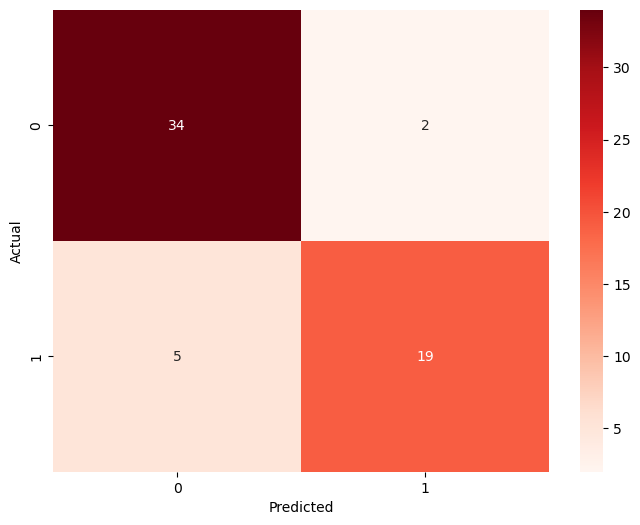

In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

best_svm = SVC(kernel='linear', C=best_C)
best_svm.fit(X_train_standardized, y_train)

y_pred = best_svm.predict(X_test_standardized)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Multiclass classification with One vs. One

While Support Vector Machines (SVMs) are by design binary classifiers, the One vs. One (OvO) method can be used to adapt them for multiclass classification problems. The algorithm works as follows:

Given a dataset with C classes, create and train $C(C-1)/2$ binary classifiers, one for each class against every other class. For prediction, an unseen example is given to all these binary classifiers, each returning its own prediction.  The class that wins the majority vote is returned as the final class.

* **(30 points)** (30 points) Define a class named `OneVOne` that implements the One vs. One algorithm to generalize the linear Support Vector Classification (SVC) models to multiclass classification. This class should follow the structure of a typical SciKit Learn estimator by inheriting from `sklearn.base.BaseEstimator` and should include `fit and `predict` functions.

In [9]:
from sklearn.svm import SVC
from sklearn.base import BaseEstimator

class OneVOne(BaseEstimator):
    def __init__(self, kernel='linear'):
        self.kernel = kernel
        self.models = []

    def fit(self, X, y):
        self.num_classes = len(set(y))
        
        # Classifiers for each class combination (C(C-1)/2 classifiers)
        for class_1 in range(self.num_classes):
            for class_2 in range(class_1 + 1, self.num_classes):
                # class_1 vs. class_2
                binary_classifier = SVC(kernel=self.kernel)
                
                # Filter the data
                binary_X = X[(y == class_1) | (y == class_2)]
                binary_y = y[(y == class_1) | (y == class_2)]
                
                binary_y = [1 if label == class_1 else -1 for label in binary_y]
                binary_classifier.fit(binary_X, binary_y)
                
                # Store the trained classifier
                self.models.append((class_1, class_2, binary_classifier))

    def predict(self, X):
        binary_predictions = []
        
        for class_1, class_2, binary_classifier in self.models:
            binary_prediction = binary_classifier.predict(X)
            binary_prediction = [class_1 if label == 1 else class_2 for label in binary_prediction]
            binary_predictions.append(binary_prediction)
         
        final_predictions = []
        
        # Majority voting to determine the final class label
        for i in range(len(X)):
            class_votes = [0] * self.num_classes
            for j in range(len(self.models)):
                class_votes[binary_predictions[j][i]] += 1
            final_predictions.append(max(range(self.num_classes), key=lambda x: class_votes[x]))
        
        return final_predictions

* **(15 points)** Test your implementation using a dataset created with SciKit Learn's `make_blobs` function, featuring 2 features and 5 centers, with a random state set to 11 to ensure replicability. Plot the decision regions produced by your implementation alongside the regions generated by SciKit Learn's implementation of the same algorithm. You can activate SciKit Learn's implementation using the `decision_function_shape='ovo'` parameter.

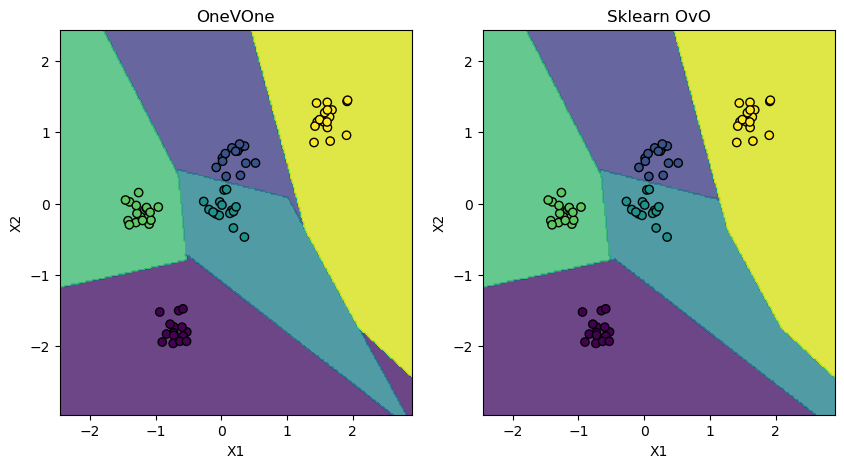

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_blobs

# Generate a dataset
X, y = make_blobs(n_samples=100, n_features=2, centers=5, random_state=11)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

# Standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#created ovo
ovo_classifier = OneVOne()
ovo_classifier.fit(X_train, y_train)
ovo_predictions = ovo_classifier.predict(X_test)

#sklearn ovo
sklearn_ovo_classifier = OneVsOneClassifier(SVC(kernel='linear', decision_function_shape='ovo'))
sklearn_ovo_classifier.fit(X_train, y_train)
sklearn_ovo_predictions = sklearn_ovo_classifier.predict(X_test)

ovo_accuracy = accuracy_score(y_test, ovo_predictions)
sklearn_ovo_accuracy = accuracy_score(y_test, sklearn_ovo_predictions)

# Plot function
def plot_decision_regions(X, y, classifier, title):
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.array(Z)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title(title)

# OneVOne
plt.figure(1, figsize=(10, 5))
plt.subplot(121)
plot_decision_regions(X_train, y_train, ovo_classifier, 'OneVOne Decision Regions')
plt.title('OneVOne')

# sklearn OvO
plt.subplot(122)
plot_decision_regions(X_train, y_train, sklearn_ovo_classifier, 'Sklearn OvO Decision Regions')
plt.title('Sklearn OvO')

plt.show()